<a href="https://colab.research.google.com/github/richardajpr/deep_learning/blob/master/keras_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist

In [0]:
import matplotlib.pyplot as plt

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 12)

In [7]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
history = model.fit(X_train, y_train,
                    epochs = 10,
                    validation_data=(X_val, y_val)
                    )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 4s 93us/sample - loss: 0.3703 - acc: 0.8944 - val_loss: 0.1770 - val_acc: 0.9469
Epoch 2/10
45000/45000 [==============================] - 4s 86us/sample - loss: 0.1731 - acc: 0.9493 - val_loss: 0.1198 - val_acc: 0.9639
Epoch 3/10
45000/45000 [==============================] - 4s 85us/sample - loss: 0.1294 - acc: 0.9622 - val_loss: 0.1039 - val_acc: 0.9693
Epoch 4/10
45000/45000 [==============================] - 4s 86us/sample - loss: 0.1050 - acc: 0.9686 - val_loss: 0.0927 - val_acc: 0.9715
Epoch 5/10
45000/45000 [==============================] - 4s 84us/sample - loss: 0.0896 - acc: 0.9730 - val_loss: 0.0921 - val_acc: 0.9720
Epoch 6/10
45000/45000 [==============================] - 4s 83us/sample - loss: 0.0767 - acc: 0.9762 - val_loss: 0.0795 - val_acc: 0.9764
Epoch 7/10
45000/45000

In [9]:
tr_loss, tr_accuracy = model.evaluate(X_train, y_train, verbose=False)
print(f"Training Accuracy: {tr_accuracy*100: 2.4f}%")
te_loss, te_accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f"Testing Accuracy:  {te_accuracy*100: 2.4f}%")

Training Accuracy:  99.4489%
Testing Accuracy:   97.8300%


In [0]:
tr_acc = history.history['acc']
val_acc = history.history['val_acc']
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(tr_acc) + 1)

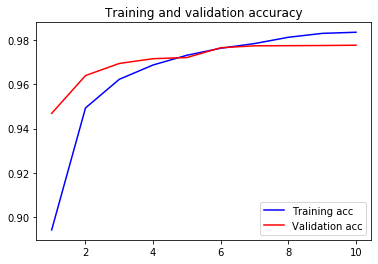

In [11]:
  plt.plot(x, tr_acc, 'b', label='Training acc')
  plt.plot(x, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

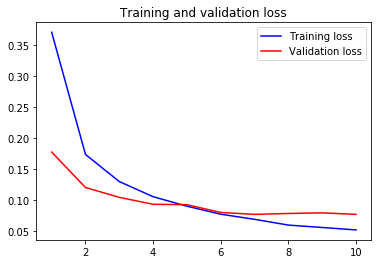

In [13]:
  plt.plot(x, tr_loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()